In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv("../data/student-mat.csv", sep=";")
df2 = pd.read_csv("../data/student-por.csv", sep=";")

In [12]:
print(f"The shape of df1 is {df1.shape}") 
print(f"The shape of df2 is {df2.shape}") 

The shape of df1 is (395, 33)
The shape of df2 is (649, 33)


In [14]:
df_combined = pd.concat([df1, df2], ignore_index=True)

In [16]:
print(f"The Combined dataset now has a shape of {df_combined.shape}")

The Combined dataset now has a shape of (1044, 33)


In [22]:
df_combined.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
for i in df_combined.columns:
    print(i, end=", ",)

school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, 

## Building the First Regression Model  

### Objective  
In this section, we will train a simple regression model to predict students' final grades (**G3**) using a subset of features.  

### Selected Features  
We will use the following features:  
- `G1` (First-period grade)  
- `G2` (Second-period grade)  
- `studytime` (Weekly study time)  
- `failures` (Number of past class failures)
- `health`  (current health status)
- `absences` (Number of school absences)  

### Model Choice  
**Linear Regression**


In [35]:
df_raw = df_combined[["G3", "G1", "G2", "studytime", "failures", "health", "absences"]]
df_raw.head()

,G3,G1,G2,studytime,failures,health,absences
0,6,5,6,2,0,3,6
1,6,5,5,2,0,3,4
2,10,7,8,2,3,3,10
3,15,15,14,3,0,5,2
4,10,6,10,2,0,5,4


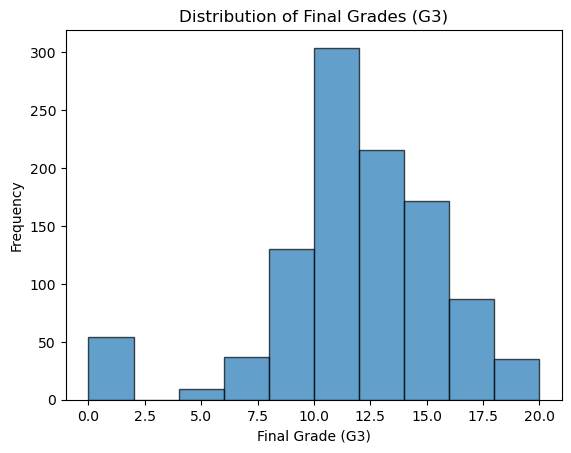

In [37]:
plt.hist(df_raw["G3"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades (G3)")
plt.show()

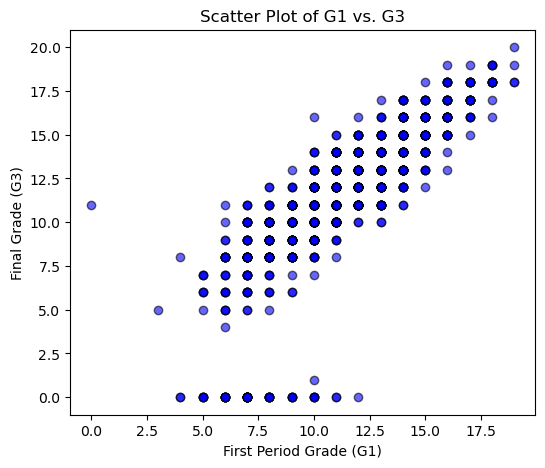

In [57]:
plt.figure(figsize=(6, 5))
plt.scatter(df_raw["G1"], df_raw["G3"], alpha=0.6, color="blue", edgecolors="black")

plt.xlabel("First Period Grade (G1)")
plt.ylabel("Final Grade (G3)")
plt.title("Scatter Plot of G1 vs. G3")

plt.show()

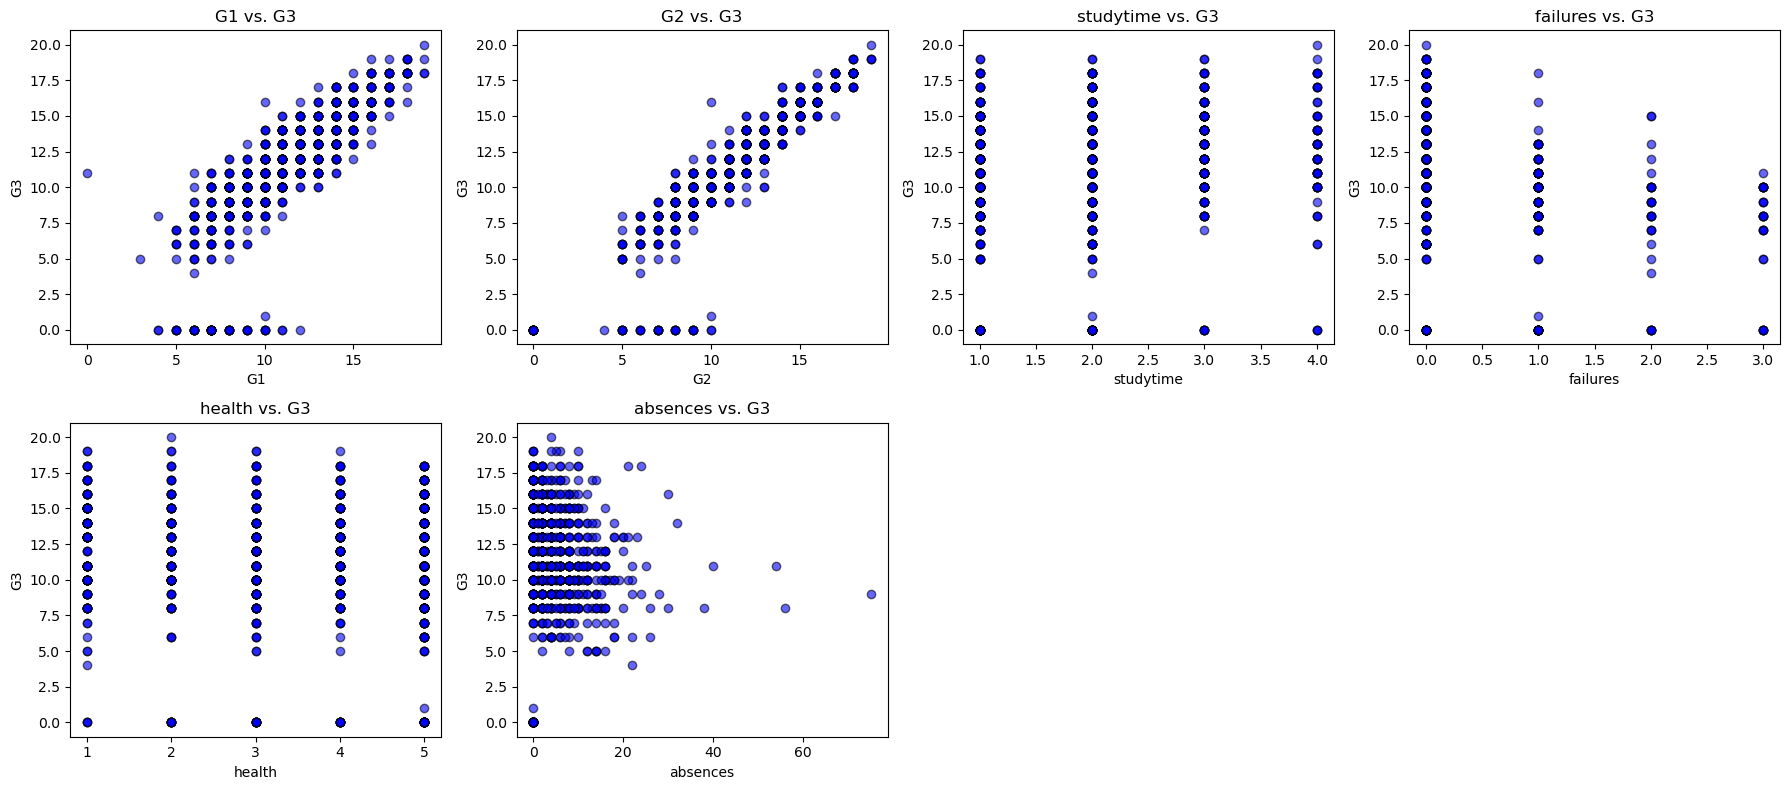

In [43]:
features_to_compare = [ "G1", "G2", "studytime", "failures", "health", "absences"]

num_features = len(features_to_compare)
rows = (num_features // 4) + (num_features % 4 > 0)  # Arrange in 4 columns

fig, axes = plt.subplots(rows, 4, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten in case we have an uneven grid

for i, feature in enumerate(features_to_compare):
    axes[i].scatter(df_raw[feature], df_["G3"], alpha=0.6, color="blue", edgecolors="black")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("G3")
    axes[i].set_title(f"{feature} vs. G3")

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

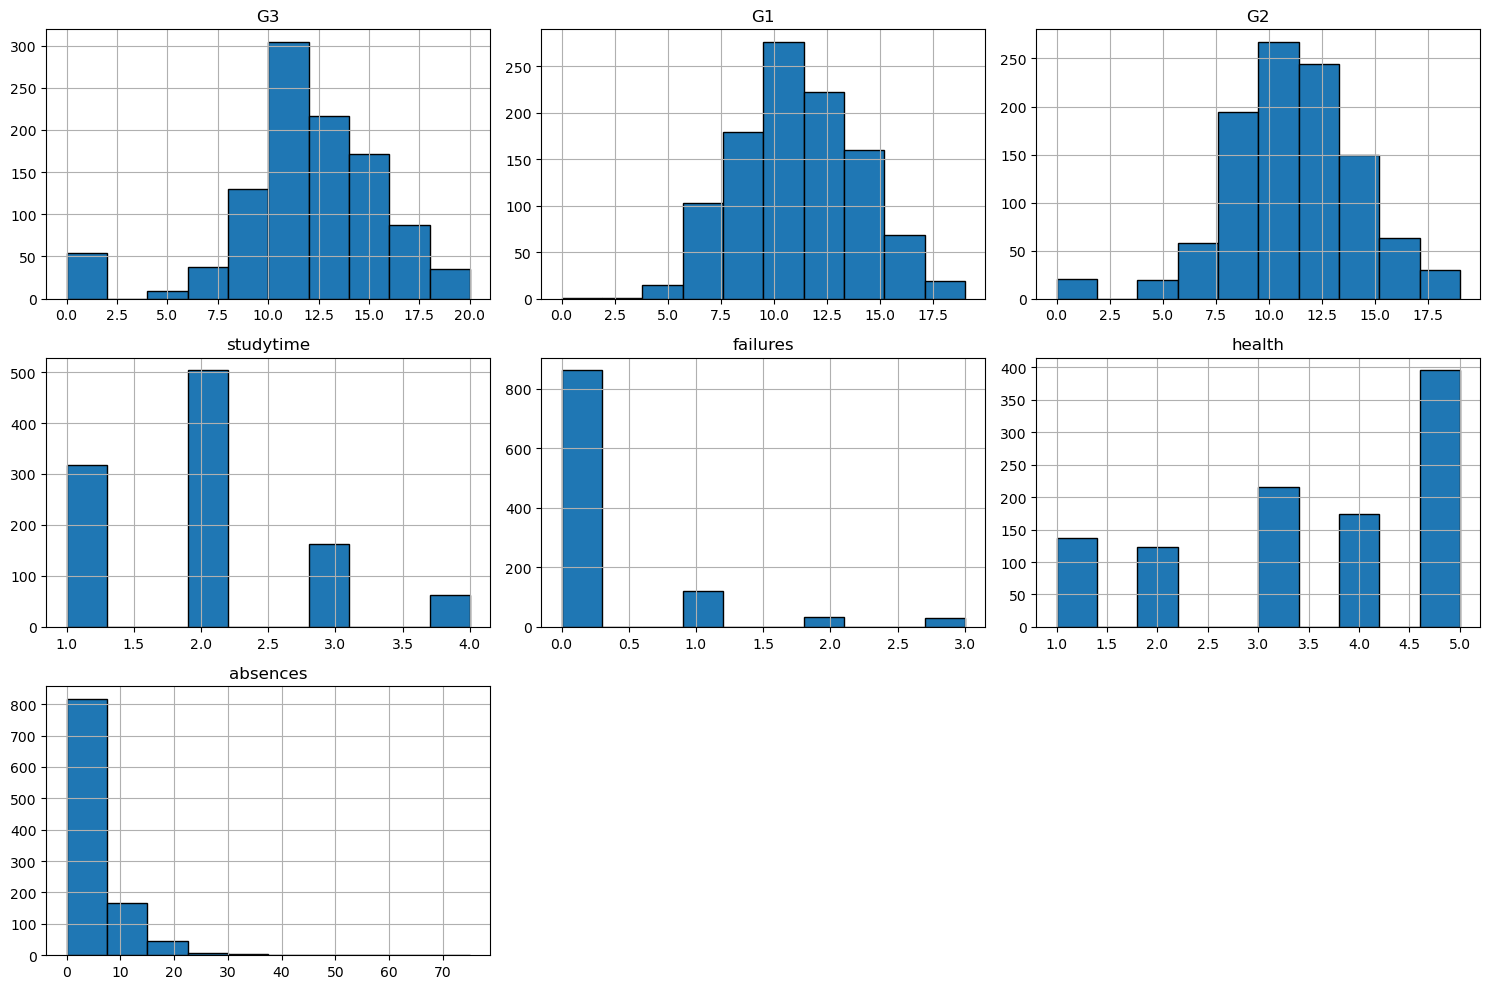

In [51]:
df_raw.hist(figsize=(15, 10), bins=10, edgecolor="black")

plt.tight_layout()
plt.show()

## Feature Scaling 

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
arr_scaled = scaler.fit_transform(df_raw)

df_scaled = pd.DataFrame(arr_scaled, columns=df_raw.columns)
df_scaled.head()

,G3,G1,G2,studytime,failures,health,absences
0,-1.382871,-2.083727,-1.597738,0.035606,-0.403106,-0.381387,0.252155
1,-1.382871,-2.083727,-1.902291,0.035606,-0.403106,-0.381387,-0.070060
2,-0.347391,-1.413029,-0.988631,0.035606,4.171268,-0.381387,0.896584
3,0.946958,1.269766,0.838688,1.234713,-0.403106,1.023086,-0.392275
4,-0.347391,-1.748378,-0.379525,0.035606,-0.403106,1.023086,-0.070060


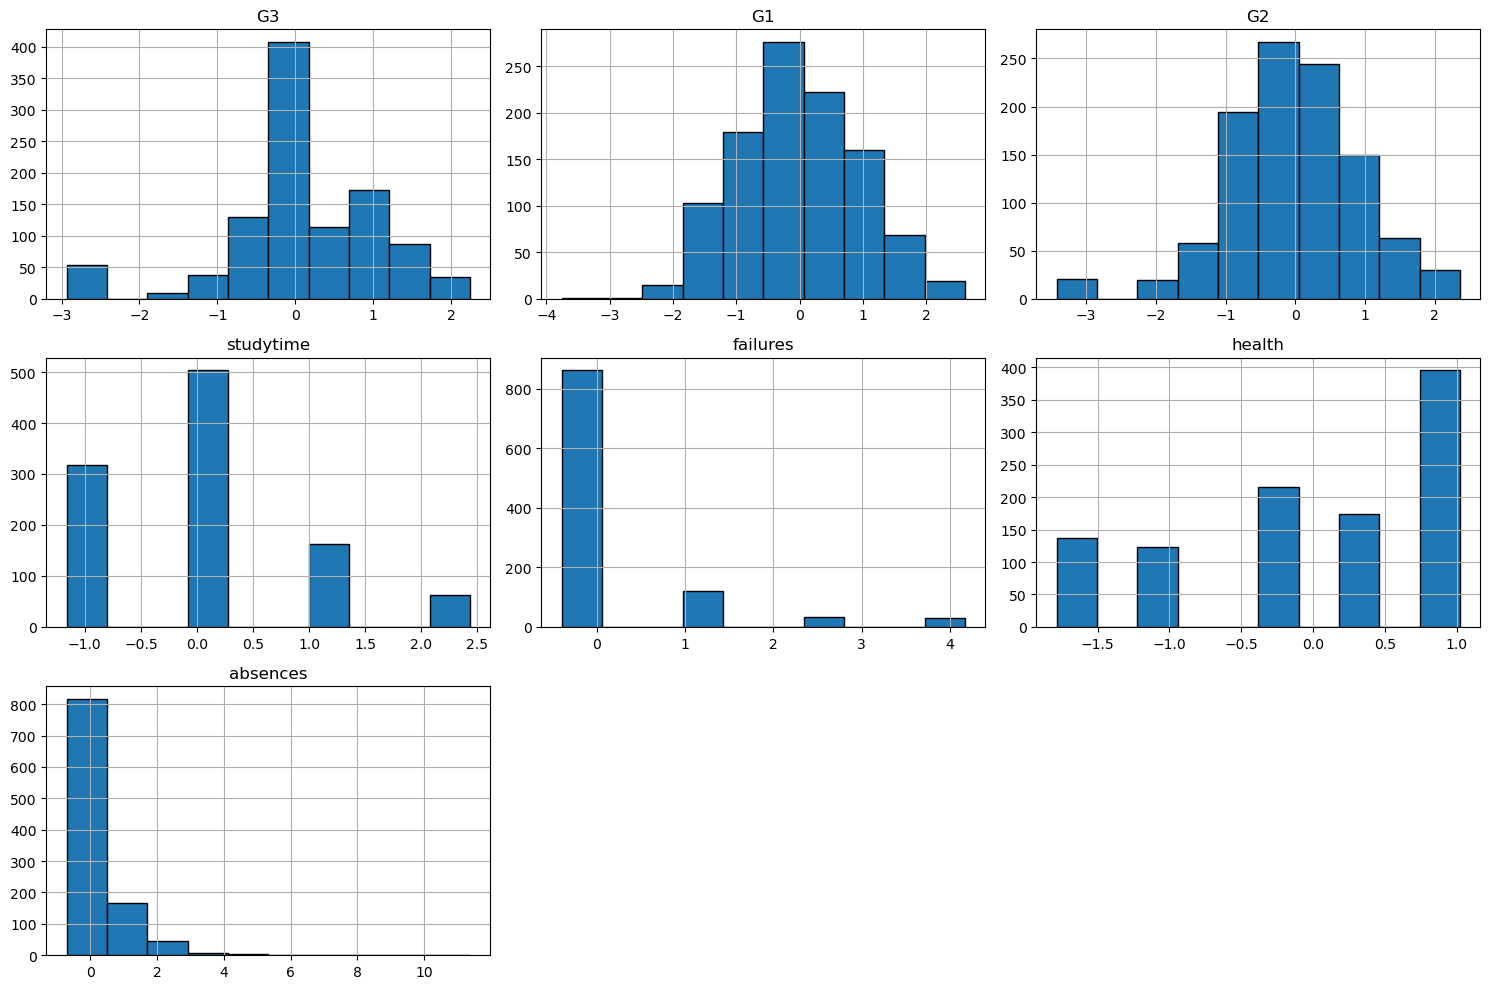

In [64]:
df_scaled.hist(figsize=(15, 10), bins=10, edgecolor="black")

plt.tight_layout()
plt.show()

### Feature Scaling Applied  

The features have been standardized using **Z-score normalization**, meaning they now have a **mean of 0** and a **standard deviation of 1**. This ensures that all features are on a similar scale, preventing any single feature from dominating the model.  

## Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split

df_scaled_features = df_scaled.drop(["G3"], axis=1)
df_scaled_target = df_scaled["G3"]

X_train, X_test, y_train, y_test = train_test_split(df_scaled_features, df_scaled_target, test_size=0.2, random_state=42)
print(f"The shape of X Train is {X_train.shape}")
print(f"The shape of X Test is {X_test.shape}")
print(f"The shape of y Train is {y_train.shape}")
print(f"The shape of y Test is {y_test.shape}")

The shape of X Train is (835, 6)
The shape of X Test is (209, 6)
The shape of y Train is (835,)
The shape of y Test is (209,)


### Model Training 

In [113]:
import sys
sys.path.append("../src")

In [115]:
from linear_regression import *

In [166]:
w, b, history = gradient_descent(X_train.values, y_train.values, 0.001, 2000)

In [168]:
print(f"The parameters w are {w}")
print(f"And the parameter b is {b}")

The parameters w are [ 0.34589011  0.51180944 -0.00712126 -0.1011232  -0.01794946  0.02300364]
And the parameter b is 0.0036931402062793453


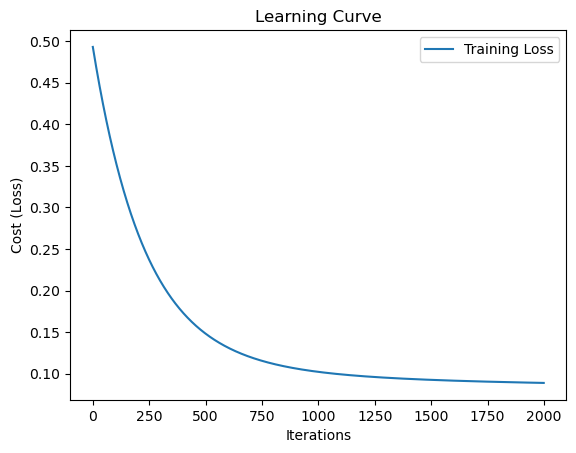

In [249]:
plt.plot(range(len(history)), history, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Learning Curve")
plt.legend()

plt.savefig("../results/Learning_Curve.png", dpi=300)
plt.show()

In [172]:
y_pred = np.dot(X_train, w) + b

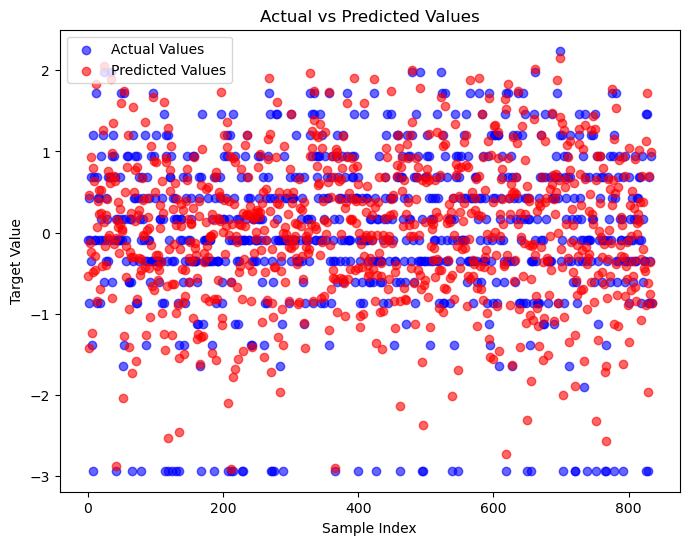

In [251]:
x = np.arange(len(y_train))  # Indices for plotting

plt.figure(figsize=(8, 6))

plt.scatter(x, y_train, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(x, y_pred, color='red', label='Predicted Values', alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values")
plt.legend()

plt.savefig("../results/predictions_vs_actual.png", dpi=300)
plt.show()

In [129]:
compute_cost(X_train.values, y_train.values, w, b)

0.09250251025905339

In [176]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.4214


In [178]:
mean_squared_error(y_train, y_pred)

0.17762006310430586

In [180]:
y_pred_test = np.dot(X_test, w) + b

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

RMSE: 0.4892
MSE: 0.2393


## Model Performance Metrics

The model's performance is evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

- **Mean Squared Error (MSE):** 0.1776 
- **Root Mean Squared Error (RMSE):**  0.4214

And the performance on the test data:
- **Mean Squared Error (MSE):** 0.2393
- **Root Mean Squared Error (RMSE):**  0.4892



### Let's train the same model using the Scikit-Learn Library

In [152]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=0.01, max_iter=1, warm_start=True)

sgd.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=1, warm_start=True)

In [154]:
w = sgd.coef_      # Coefficients (weights)
b = sgd.intercept_ # Intercept (bias)

print("Weights (w):", w)
print("Bias (b):", b)

Weights (w): [ 0.22198176  0.71141353 -0.01116701 -0.11866454 -0.02538156  0.06903792]
Bias (b): [-0.0104316]


In [156]:
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test RMSE: {rmse_test:.4f}")


Train MSE: 0.1654, Train RMSE: 0.4067
Test MSE: 0.2200, Test RMSE: 0.4691


## Model Performance Evaluation  

The model's performance on the training and test sets is measured using **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**:  

- **Training Set:**  
  - **MSE:** 0.1654  
  - **RMSE:** 0.4067  

- **Test Set:**  
  - **MSE:** 0.2200  
  - **RMSE:** 0.4691  


## Comparison of Model Performance  

We compare the performance of **SGDRegressor (Scikit-Learn)** with the **custom gradient descent implementation**. The evaluation is based on **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** for both training and test sets.  

### **SGDRegressor (Scikit-Learn)**  
- **Training Set:**
  - **MSE:** 0.1654  
  - **RMSE:** 0.4067  
- **Test Set:**
  - **MSE:** 0.2200  
  - **RMSE:** 0.4691  

### **Custom Gradient Descent Implementation**  
- **Training Set:**
  - **MSE:** 0.1776  
  - **RMSE:** 0.4214  
- **Test Set:**
  - **MSE:** 0.2393  
  - **RMSE:** 0.4892  

### **Analysis**  
- **SGDRegressor slightly outperforms the custom gradient descent** in terms of both **MSE and RMSE** on training and test data.  
- The difference is **small**, indicating that both models are learning effectively.  
- **SGDRegressor benefits from built-in optimizations** like adaptive learning rates and better convergence properties.  
- The **custom implementation is very close**, suggesting a well-implemented gradient descent algorithm.  

### **Conclusion**  
Both models generalize well, with no major signs of overfitting or underfitting. However, **SGDRegressor achieves slightly lower errors**, making it a better choice for efficiency and stability in real-world applications.


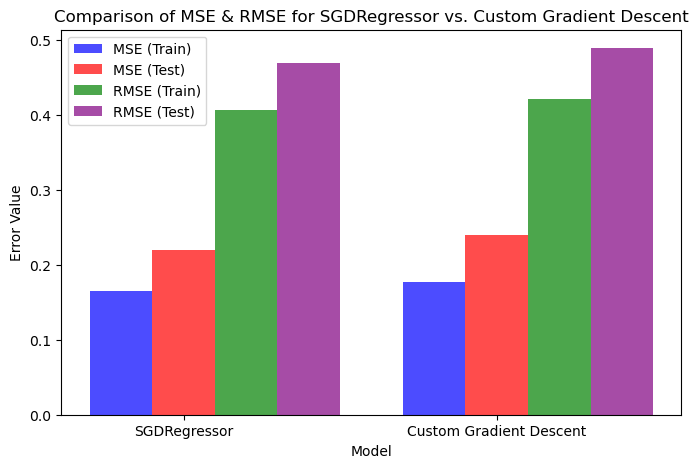

In [184]:
import matplotlib.pyplot as plt
import numpy as np

models = ["SGDRegressor", "Custom Gradient Descent"]

mse_train = [0.1654, 0.1776]
mse_test = [0.2200, 0.2393]

rmse_train = [0.4067, 0.4214]
rmse_test = [0.4691, 0.4892]

x = np.arange(len(models))

bar_width = 0.2  

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - bar_width, mse_train, width=bar_width, label="MSE (Train)", color="blue", alpha=0.7)
ax.bar(x, mse_test, width=bar_width, label="MSE (Test)", color="red", alpha=0.7)
ax.bar(x + bar_width, rmse_train, width=bar_width, label="RMSE (Train)", color="green", alpha=0.7)
ax.bar(x + 2 * bar_width, rmse_test, width=bar_width, label="RMSE (Test)", color="purple", alpha=0.7)

ax.set_xlabel("Model")
ax.set_ylabel("Error Value")
ax.set_title("Comparison of MSE & RMSE for SGDRegressor vs. Custom Gradient Descent")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


## Training the Model with All Features and Regularization  

### Objective  
We now train the model using **all available features** to capture more patterns in the data. To prevent overfitting, we apply **regularization**, which penalizes large coefficients and improves generalization.  


In [189]:
df_combined.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Preprocessing

In [192]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [194]:
categorical_features = df_combined.select_dtypes(include=["object"]).columns

numerical_features = df_combined.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Features:", list(categorical_features))
print("Numerical Features:", list(numerical_features))


Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [202]:
df_combined[categorical_features].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [217]:
df_encoded = pd.get_dummies(df_combined, columns=categorical_features, drop_first=True)

### Feature Scaling

In [219]:
df_encoded.shape

(1044, 42)

In [223]:
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [225]:
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.027889,1.242077,1.466302,0.652210,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,...,True,False,True,False,False,False,True,True,False,False
1,0.221035,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,1.140653,-0.195099,-0.135527,-0.542374,...,False,False,False,True,False,False,False,True,True,False
2,-1.392674,-1.426089,-1.262431,-0.715074,0.035606,4.171268,0.068788,-0.195099,-1.003566,0.554987,...,True,False,True,False,True,False,True,True,True,False
3,-1.392674,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-1.003076,-1.165019,-1.003566,-0.542374,...,True,False,False,True,True,True,True,True,True,True
4,-0.585820,0.352689,0.556724,-0.715074,0.035606,-0.403106,0.068788,-0.195099,-1.003566,-0.542374,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.834744,-0.536700,0.556724,-0.715074,1.234713,1.121686,1.140653,0.774821,-1.003566,-0.542374,...,True,False,False,False,False,True,False,True,True,False
1040,1.027889,0.352689,-1.262431,-0.715074,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,...,True,False,False,True,False,False,True,True,True,False
1041,1.027889,-1.426089,-1.262431,0.652210,0.035606,-0.403106,-3.146806,-2.134939,-1.871604,-0.542374,...,True,False,False,False,False,True,True,True,False,False
1042,0.221035,0.352689,-1.262431,0.652210,-1.163502,-0.403106,-2.074941,0.774821,1.600550,1.652347,...,True,False,False,False,False,False,False,True,True,False


In [227]:
correlation = df_encoded.corr()["G3"].sort_values(ascending=False)

print(correlation)


G3                   1.000000
G2                   0.910743
G1                   0.809142
higher_yes           0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
address_U            0.117696
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
Mjob_teacher         0.084521
famsize_LE3          0.061209
famrel               0.054461
Mjob_services        0.045015
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
Fjob_other          -0.023825
Pstatus_T           -0.030693
sex_M               -0.031472
Fjob_services       -0.035273
reason_other        -0.043097
absences            -0.045671
paid_yes            -0.049388
freetime            -0.064890
Mjob_other          -0.066051
schoolsup_yes       -0.079346
health              -0.080079
guardian_o

## Model Training

In [230]:
df_encoded_features = df_encoded.drop(["G3"], axis=1)
target = df_encoded.G3

X_train, X_test, y_train, y_test = train_test_split(df_encoded_features, target, test_size=0.2, random_state=42)
print(f"The shape of X Train is {X_train.shape}")
print(f"The shape of X Test is {X_test.shape}")
print(f"The shape of y Train is {y_train.shape}")
print(f"The shape of y Test is {y_test.shape}")

The shape of X Train is (835, 41)
The shape of X Test is (209, 41)
The shape of y Train is (835,)
The shape of y Test is (209,)


In [234]:
sgd = SGDRegressor(
    penalty="elasticnet",   
    alpha=0.001,             
    l1_ratio=0.5,            
    max_iter=5000,           
    tol=1e-4,                
    learning_rate="adaptive", 
    eta0=0.01,    
    early_stopping=True,    
    validation_fraction=0.1,
    n_iter_no_change=10,    
    random_state=42
)

In [236]:
sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.001, early_stopping=True, l1_ratio=0.5,
             learning_rate='adaptive', max_iter=5000, n_iter_no_change=10,
             penalty='elasticnet', random_state=42, tol=0.0001)

In [238]:
# Make predictions on training and test sets
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)

In [240]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print results
print(f"Train MSE: {mse_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test RMSE: {rmse_test:.4f}")


Train MSE: 0.1494, Train RMSE: 0.3865
Test MSE: 0.2083, Test RMSE: 0.4564


## Comparison of Model Performance  

This comparison evaluates different models based on **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**.  

### **1️⃣ SGDRegressor with Elastic Net (All Features & Regularization)**  
- **Train MSE:** 0.1494  
- **Train RMSE:** 0.3865  
- **Test MSE:** 0.2083  
- **Test RMSE:** 0.4564  

This model was trained using **all available features** and was **regularized with Elastic Net** to prevent overfitting. The use of **L1 and L2 penalties** helped balance feature selection and weight shrinkage, leading to the **lowest error values** among all models.  

---

### **2️⃣ SGDRegressor with Subset of Features (Default Settings)**  
- **Train MSE:** 0.1654  
- **Train RMSE:** 0.4067  
- **Test MSE:** 0.2200  
- **Test RMSE:** 0.4691  

This model used only a **subset of selected features** without explicit regularization. While it performed well, it did not generalize as effectively as the fully regularized model.

---

### **3️⃣ Custom Gradient Descent (Subset of Features, No Regularization)**  
- **Train MSE:** 0.1776  
- **Train RMSE:** 0.4214  
- **Test MSE:** 0.2393  
- **Test RMSE:** 0.4892  

This model was implemented with **manual gradient descent** and trained using the **same subset of features** as the default `SGDRegressor`. However, it lacked **adaptive learning rates and built-in optimizations**, leading to slightly higher error values compared to the Scikit-Learn models.

---

## **📌 Key Observations**
- **Using all features and applying Elastic Net regularization led to the best performance** (lowest MSE & RMSE).  
- **Regularization improved generalization**, reducing the gap between train and test errors.  
- **The manually implemented gradient descent performed well**, but was slightly outperformed by Scikit-Learn's optimized implementations.  

### **📌 Conclusion**  
The **SGDRegressor with all features and Elastic Net regularization** is the best model, achieving the **lowest error while preventing overfitting**. The results demonstrate the importance of **feature selection, regularization, and adaptive optimization techniques** in improving model performance.


In [243]:

with open("../results/model_performance.txt", "w") as f:
    f.write("SGDRegressor with Elastic Net (All Features & Regularization)\n")
    f.write(f"Train MSE: {0.1494}, Train RMSE: {0.3865}\n")
    f.write(f"Test MSE: {0.2083}, Test RMSE: {0.4564}\n\n")

    f.write("SGDRegressor with Subset of Features (Default Settings)\n")
    f.write(f"Train MSE: {0.1654}, Train RMSE: {0.4067}\n")
    f.write(f"Test MSE: {0.2200}, Test RMSE: {0.4691}\n\n")

    f.write("Custom Gradient Descent (Subset of Features, No Regularization)\n")
    f.write(f"Train MSE: {0.1776}, Train RMSE: {0.4214}\n")
    f.write(f"Test MSE: {0.2393}, Test RMSE: {0.4892}\n")


In [245]:
results_df = pd.DataFrame({
    "Model": ["SGDRegressor (All Features & Regularization)",
              "SGDRegressor (Subset of Features)",
              "Custom Gradient Descent (Subset, No Regularization)"],
    "Train MSE": [0.1494, 0.1654, 0.1776],
    "Train RMSE": [0.3865, 0.4067, 0.4214],
    "Test MSE": [0.2083, 0.2200, 0.2393],
    "Test RMSE": [0.4564, 0.4691, 0.4892]
})

results_df.to_csv("../results/model_performance.csv", index=False)


In [247]:
np.save("../results/sgd_weights.npy", sgd.coef_)  # Save weights
np.save("../results/sgd_bias.npy", sgd.intercept_)  # Save bias
